In [1]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [118]:
#Used Libraries 
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import requests
import urllib
import matplotlib.pyplot as plt
import numpy as np

In [102]:
vocab_size = 10000
embedding_dim = 16
max_len = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [90]:
#Importing Data in Json format converting it to Lists
URL='https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json'
# json_url=urllib.urlopen(URL)
              
# data=json.load(json_url.read())
data=requests.get(URL).json()
dictionary=data[0]
# print (data.json())

In [91]:
dictionary

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [92]:
dictionary['headline']

"former versace store clerk sues over secret 'black code' for minority shoppers"

In [93]:
type(data)

list

In [94]:
#Converting data into Model Form
sentence=[]
label=[]

for item in data:
    sentence.append(item['headline'])
    label.append(item['is_sarcastic'])

In [95]:
sentence[0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

In [96]:
#spliting Dataset into trainging/test folds
training_limit=int((len(sentence)*0.8))

training_sentences=sentence[0:training_limit]
test_sentences=sentence[training_limit:]
training_labels=label[0:training_limit]
test_labels=label[training_limit:]

In [100]:
#tokenization
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)  
# tokenizer=Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)           #tokenizing training data only to make sure model haven't seen test data
words_index=tokenizer.word_index

In [85]:
len(words_index)

26507

In [109]:
#sequencing and padding training and test data
training_sequence=tokenizer.texts_to_sequences(training_sentences)
training_padding=pad_sequences(training_sequence,maxlen=max_len,truncating=trunc_type,padding=padding_type)
test_sequence=tokenizer.texts_to_sequences(test_sentences)
test_padding=pad_sequences(test_sequence,maxlen=max_len,truncating=trunc_type,padding=padding_type)

In [115]:
# Need this block to get it to work with TensorFlow 2.x
training_padding = np.array(training_padding)
training_labels = np.array(training_labels)
test_padding = np.array(test_padding)
test_labels = np.array(test_labels)

In [110]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [116]:
#training the Algorithm
num_epochs = 30
history = model.fit(training_padding, training_labels, epochs=num_epochs, validation_data=(test_padding, test_labels), verbose=2)

Epoch 1/30
668/668 - 4s - loss: 0.6566 - accuracy: 0.6006 - val_loss: 0.5413 - val_accuracy: 0.8098
Epoch 2/30
668/668 - 1s - loss: 0.4067 - accuracy: 0.8397 - val_loss: 0.3718 - val_accuracy: 0.8471
Epoch 3/30
668/668 - 1s - loss: 0.2979 - accuracy: 0.8821 - val_loss: 0.3489 - val_accuracy: 0.8560
Epoch 4/30
668/668 - 1s - loss: 0.2486 - accuracy: 0.9036 - val_loss: 0.3461 - val_accuracy: 0.8549
Epoch 5/30
668/668 - 1s - loss: 0.2159 - accuracy: 0.9175 - val_loss: 0.3496 - val_accuracy: 0.8551
Epoch 6/30
668/668 - 1s - loss: 0.1907 - accuracy: 0.9273 - val_loss: 0.3600 - val_accuracy: 0.8521
Epoch 7/30
668/668 - 1s - loss: 0.1690 - accuracy: 0.9369 - val_loss: 0.3750 - val_accuracy: 0.8510
Epoch 8/30
668/668 - 1s - loss: 0.1513 - accuracy: 0.9445 - val_loss: 0.3944 - val_accuracy: 0.8506
Epoch 9/30
668/668 - 1s - loss: 0.1375 - accuracy: 0.9519 - val_loss: 0.4183 - val_accuracy: 0.8472
Epoch 10/30
668/668 - 1s - loss: 0.1250 - accuracy: 0.9549 - val_loss: 0.4380 - val_accuracy: 0.8467

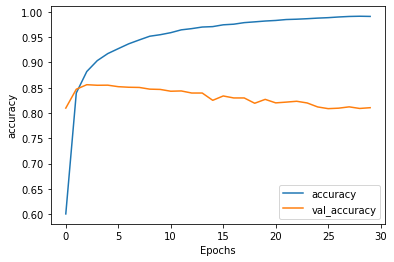

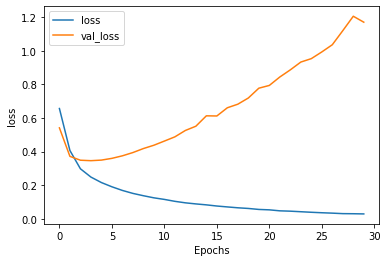

In [119]:
#plotting output
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [122]:
#making predections
sent = ["granny starting to fear spiders in the garden might be real",
        "game of thrones season finale showing this sunday night"]

sequences = tokenizer.texts_to_sequences(sent)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.0897387e-01]
 [1.6609463e-05]]
